<a href="https://colab.research.google.com/github/un21988/CE888-7/blob/main/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
from zipfile import ZipFile
file_name = "/content/bank-additional.zip"



In [7]:
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('File has been extracted')

File has been extracted


In [25]:
dataframe = pd.read_csv("/content/bank-additional/bank-additional-full.csv", sep=";")
dataframe.head(3)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**process**

In [26]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
dataframe.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

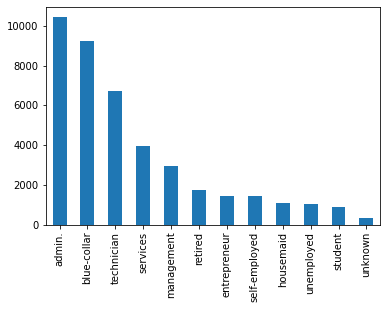

In [30]:
dataframe['job'].value_counts().plot(kind='bar')

In [34]:
#converting the lable into values by Encoding
obj_dataframe = dataframe.select_dtypes(include=['object']).copy()
Encoding = obj_dataframe.apply(label.fit_transform)
Encoding.head(10)


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,1,0,0,1,6,1,1,0
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,2,1,6,1,1,0
5,7,1,2,1,0,0,1,6,1,1,0
6,0,1,5,0,0,0,1,6,1,1,0
7,1,1,7,1,0,0,1,6,1,1,0
8,9,2,5,0,2,0,1,6,1,1,0
9,7,2,3,0,2,0,1,6,1,1,0


In [36]:
dataframe_dummies = pd.get_dummies(dataframe)
dataframe_dummies.head(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


In [37]:
#droping durating coloume
dataframe.drop('duration', axis=1, inplace=True)
dataframe.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [38]:
dataframe.drop(obj_dataframe, axis=1, inplace=True)
dataframe = pd.concat([dataframe, Encoding], axis=1, join='inner')
display(dataframe)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,1,0,0,0,0,1,6,1,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,1,0,0,1,6,1,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,2,0,1,6,1,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,1,0,0,0,1,6,1,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,7,1,3,0,0,2,1,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,1,5,0,2,0,0,7,0,1,1
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,1,5,0,0,0,0,7,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,1,6,0,2,0,0,7,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,9,1,5,0,0,0,0,7,0,1,1


In [41]:

dataframe_Missing = dataframe.dropna( axis=0, how='all')
dataframe.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job',
       'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

**Modeling:**

In [43]:
from sklearn.model_selection import train_test_split
x_axsis = dataframe[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']]
y_axsis = dataframe['y']
X_train, X_test, y_train, y_test = train_test_split(x_axsis, y_axsis,stratify=y_axsis, test_size=0.20,random_state=50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32950, 19) (8238, 19) (32950,) (8238,)


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clfRF1 = RandomForestClassifier(max_depth=3,n_estimators=100, )
clfRF1.fit(x_axsis, y_axsis)
y_pred = clfRF1.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)

print("we got the accuracy about ","{:.3f}".format(accuracy), "%")

we got the accuracy about  0.90 %


In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
RFC=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 250, 300 ],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4],
    'criterion' :['gini', 'entropy']
}
CVRFC = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 5)
CVRFC.fit(x_axsis, y_axsis)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [48]:
y_pred_ = CVRFC.predict(X_test)
accuracy = accuracy_score ( y_test, y_pred_ )
print("we got the accuracy about ","{:.2f}".format(accuracy), "%")

we got the accuracy about  0.90 %


F: 0, S: 0.01360
F: 1, S: 0.00014
F: 2, S: 0.00074
F: 3, S: 0.00048
F: 4, S: 0.00146
F: 5, S: 0.00000
F: 6, S: 0.00005
F: 7, S: 0.00706
F: 8, S: 0.02108
F: 9, S: 0.00148
F: 10, S: 0.00097
F: 11, S: 0.15489
F: 12, S: 0.01144
F: 13, S: 0.10793
F: 14, S: 0.09550
F: 15, S: 0.04427
F: 16, S: 0.05354
F: 17, S: 0.21776
F: 18, S: 0.26761


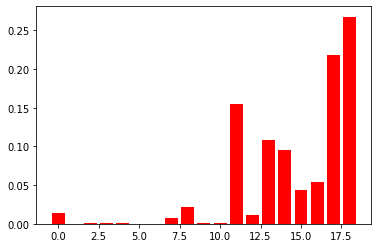

In [55]:
from matplotlib import pyplot
importance = clfRF1.feature_importances_

for i,j in enumerate(importance):
	print('F: %0d, S: %.5f' % (i,j))

pyplot.bar([x for x in range(len(importance))], importance,color='Red')
pyplot.show()